# Now it's your turn! 

Choose the dataset you prefer in this website and start analysing the variables and data inside! 
https://datos.civio.es/datasets/

If you feel more confident to try gradually and check your results step-by-step, you can choose the same example I will use to go through and share on the screen. We will follow some key concepts that could be a typical pipeline for data analysis.

https://datos.civio.es/dataset/resultados-de-las-inspecciones-de-seguridad-alimentaria-en-establecimientos-de-madrid/

But if you prefer another dataset, feel free to choose another one!
* You can always guide you with this example to start and then explore on your own.
* Ask and share your doubts so we all learn from other examples!
* If you choose another one, tell us what you observed!




---
## 1. Download dataset & Import libraries

---


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## 2. Read csv & Explore the dataset!

* How many registers and columns do we have?
* Type of variables and how does look like the data inside?
* Do we have missing values? 
* How would you better rename the labels or redefine the order of registers?
---

In [5]:
df = pd.read_csv('casos-sarampion.csv')
df

,WHO_REGION,ISO_code,Cname,Disease,2015,2014,2013,2012,2011,2010,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,EMR,AFG,Afghanistan,measles,1154.0,492.0,430.0,2787.0,3013.0,1989.0,...,1170.0,4561.0,10357.0,8107.0,14457.0,16199.0,18808.0,20320.0,31107.0,32455.0
1,EUR,ALB,Albania,measles,NaN,NaN,0.0,9.0,28.0,10.0,...,136034.0,0.0,0.0,0.0,0.0,0.0,17.0,3.0,NaN,NaN
2,AFR,DZA,Algeria,measles,63.0,0.0,25.0,18.0,112.0,103.0,...,4169.0,2634.0,2500.0,3975.0,20114.0,22553.0,22126.0,29584.0,20849.0,15527.0
3,EUR,AND,Andorra,measles,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFR,AGO,Angola,measles,118.0,11699.0,8523.0,4458.0,1449.0,1190.0,...,19820.0,21009.0,13368.0,15580.0,22822.0,22685.0,22589.0,30067.0,19714.0,29656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,AMR,VEN,Venezuela (Bolivarian Republic of),measles,0.0,0.0,0.0,1.0,0.0,0.0,...,10160.0,12339.0,19261.0,14026.0,21974.0,11833.0,11263.0,14200.0,31255.0,9750.0
190,WPR,VNM,Viet Nam,measles,256.0,15033.0,1123.0,578.0,750.0,2809.0,...,22332.0,23308.0,30460.0,68463.0,82231.0,87796.0,125176.0,72466.0,62400.0,86901.0
191,EMR,YEM,Yemen,measles,468.0,815.0,400.0,2177.0,2676.0,510.0,...,26681.0,10424.0,17408.0,15596.0,27997.0,39713.0,33348.0,24482.0,21355.0,18020.0
192,AFR,ZMB,Zambia,measles,9.0,9.0,35.0,896.0,13234.0,15754.0,...,5747.0,12487.0,14793.0,23866.0,51000.0,36881.0,51140.0,73499.0,184210.0,98659.0


In [8]:
df.columns

Index(['WHO_REGION', 'ISO_code', 'Cname', 'Disease', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986',
       '1985', '1984', '1983', '1982', '1981', '1980'],
      dtype='object')

In [95]:
region_df = df.groupby('WHO_REGION').mean()
region_df['2015'].sort_values(ascending=False)


WHO_REGION
WPR     3833.882353
SEAR    2720.636364
AFR     1146.826087
EMR     1066.800000
EUR      564.304348
AMR       17.970588
Name: 2015, dtype: float64

In [32]:
# País con más cambios
df[['Cname','2015']][df['WHO_REGION'] == 'AFR'].sort_values('2015', ascending=False).head(1)

,Cname,2015
58,Ethiopia,17745.0


In [38]:
df.columns

Index(['WHO_REGION', 'ISO_code', 'Cname', 'Disease', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986',
       '1985', '1984', '1983', '1982', '1981', '1980'],
      dtype='object')

In [45]:
year_list = df.columns[-36:].sort_values(ascending=True)
year_list

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [82]:
# Evolución en España
g = df[df['Cname'] == 'Spain']
graphic = g[year_list]
graphic

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
161,145322.0,146689.0,159562.0,304350.0,38914.0,80663.0,220109.0,35146.0,22701.0,32908.0,...,362.0,267.0,297.0,41.0,302.0,3802.0,1204.0,131.0,154.0,115.0


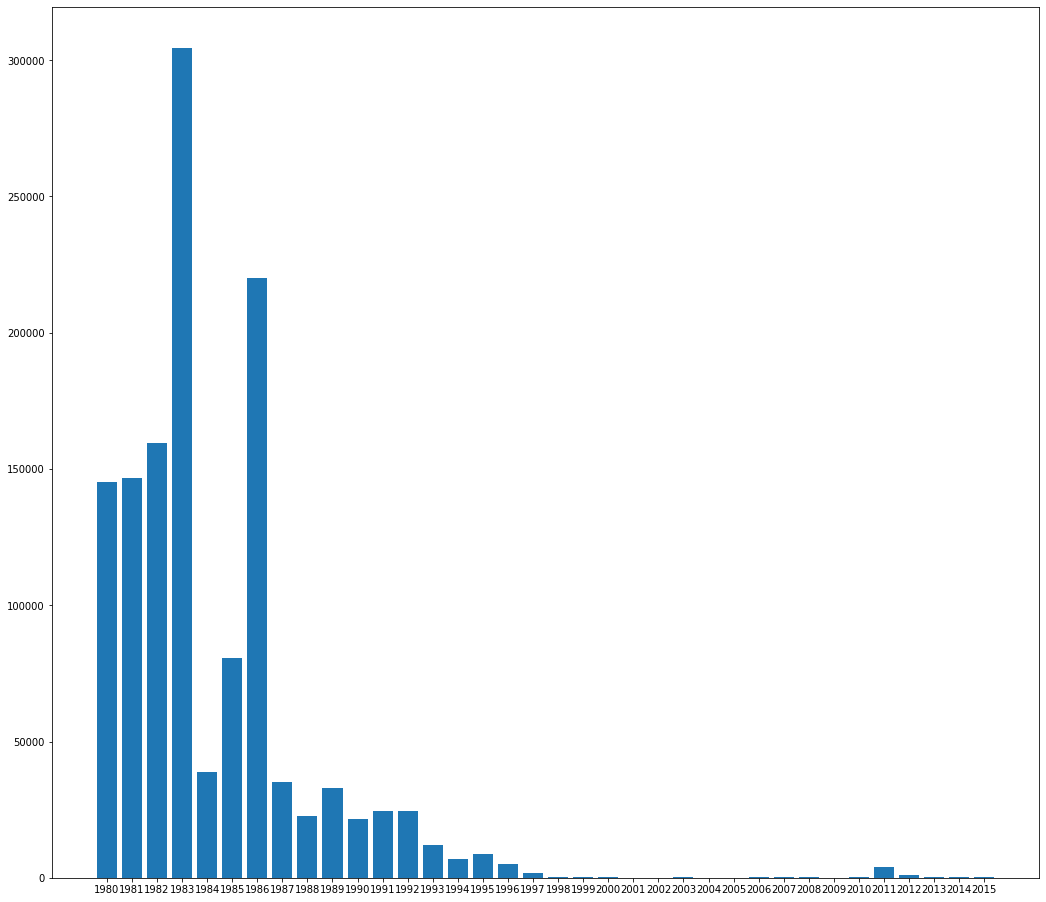

In [94]:
plt.bar(year_list, graphic.iloc[0])
plt.tight_layout(-30)
plt.show()

In [65]:
df['difference'] = df['2015'] - df['2005']
df[df['difference'] > 0].sort_values('difference', ascending=False)

,WHO_REGION,ISO_code,Cname,Disease,2015,2014,2013,2012,2011,2010,...,1988,1987,1986,1985,1984,1983,1982,1981,1980,difference
112,WPR,MNG,Mongolia,measles,20359.0,0.0,0.0,0.0,0.0,7.0,...,3044.0,378.0,133.0,525.0,29738.0,1935.0,209.0,695.0,5338.0,20359.0
91,EUR,KGZ,Kyrgyzstan,measles,17779.0,318.0,1.0,0.0,222.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17726.0
58,AFR,ETH,Ethiopia,measles,17745.0,12739.0,5253.0,4347.0,3255.0,4235.0,...,7575.0,4832.0,3760.0,66544.0,9843.0,5866.0,10527.0,9784.0,10690.0,17388.0
123,AFR,NER,Niger (the),measles,7693.0,1142.0,1224.0,272.0,771.0,372.0,...,16864.0,14290.0,17626.0,64689.0,42199.0,30288.0,39815.0,36139.0,36811.0,5510.0
53,EMR,EGY,Egypt,measles,5432.0,1314.0,405.0,245.0,26.0,16.0,...,3672.0,1805.0,1176.0,5554.0,4898.0,813.0,7365.0,1777.0,839.0,5355.0
163,EMR,SDN,Sudan (the),measles,3585.0,676.0,2813.0,8523.0,5616.0,680.0,...,7466.0,1635.0,27136.0,67589.0,2390.0,2806.0,68171.0,64804.0,50168.0,2211.0
65,EUR,DEU,Germany,measles,2464.0,443.0,1771.0,166.0,1607.0,780.0,...,17.0,189.0,199.0,568.0,11759.0,9798.0,2029.0,5290.0,28745.0,1686.0
21,EUR,BIH,Bosnia and Herzegovina,measles,1677.0,3000.0,NaN,22.0,10.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1654.0
162,SEAR,LKA,Sri Lanka,measles,1568.0,1686.0,2107.0,51.0,60.0,79.0,...,2630.0,3508.0,6235.0,9398.0,13215.0,8171.0,13273.0,6232.0,5032.0,1565.0
38,AFR,COG,Congo (the),measles,1359.0,71.0,124.0,260.0,315.0,4.0,...,454.0,1420.0,6424.0,7600.0,18615.0,16642.0,12931.0,9668.0,11892.0,1213.0


In [67]:
# Países en los que aumenta
df[df['difference'] > 0].shape

(60, 41)

In [69]:
country_increase = df[df['difference'] > 0].shape[0] / len(df) * 100

30.927835051546392

---
## 3. Analize & Understand the data!

* What conclusions could you extract by analizing each variable?
* Which variable look the most relevant one for the data owner objectives? 
 
---

---
## 4. Clean & Transform data!
* What should/could we do with missing values?
* Do we need to enrich our data analysis by creating new variables?
---

---
## 5. Look for patterns or differences to extract Insights
* Which other dimensions look interesting to cross with the main variable?
* Do you observe any interesting differences or patterns when grouping by categories?
---

---
## 6. Tell us...
* Which dataset did you choose? 
* How big or complex it was?
* What variables you found more interesting to work with?
* What did you find out?
* What are you next steps?
---

---
##7. Before leaving...Let's Share with the Pyladies Community :)
So we can all learn from and inspire to each others:
* add your Jupyter / Colab to your GitHub repository
* go to the following link: https://notepad.pw/y6gkb20i
* write your name/user : link to your Pandas repository or jupyter file

Cecil: https://github.com/gabaxi/workshops/tree/master/pandas

---